# Supplemental Numerical Experiments for "A Probabilistic Numerical Extension of the Conjugate Gradient Method"

This notebook documents how the plots in the supplemental document were produced. 

This notebook depends on the following files being in the same directory:
- plots.py
- utilities.py
- bayescg_k.py
- bayescg.py
- cgqs.py
- bcsstk18_prec.mtx
- bcsstk18.mtx

Run all cells to replicate the plots in the supplemental document. The commands that save the plots are commented out.

In [1]:
from plots import * 
from utilities import *
from bayescg import *
from bayescg_k import *
import numpy as np

from scipy.io import mmread
from time import time


## Switching the Gauss-Radau Estimates

We rerun the experiments from the paper except use the Gauss-Radau estimate that was not used in the experiment. This means we use the Gauss-Radau approximation with the $n=48$ matrix and the Gauss-Radau bound with the $n=11948$ matrix.

### First experiment

First we rerun the experiment with the $n=48$ matrix but with the Gauss-Radau *approximation* from (Meurant and Tichy, 2019).

The matrix $\mathbf{A}$ is a random $n = 48$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = 10^4 + \frac{i-1}{48-1}(1000-0.1)(0.9)^{48-i}.$$ This eigenvalue distribution is originally from (Strakos, 1991). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

#### Setup the problem

In [2]:
np.random.seed(1)

N = 48

A,_,_,min_eig,max_eig = random_matrix_generator(N,5,1)
CondA = max_eig/min_eig
NormA = max_eig

def AVec(w):
    return A@w


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

#### Run the experiment

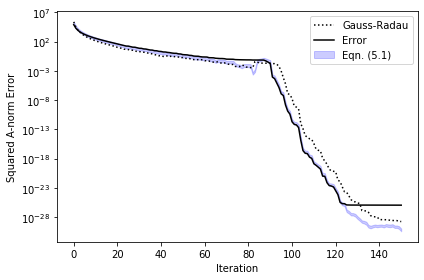

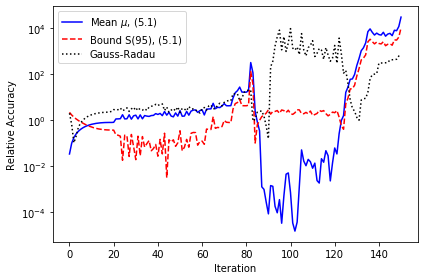

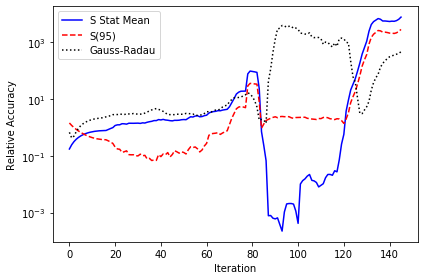

In [3]:
GR = None

#Delay
d = 4

#Iterations
it = 150

#First iterations to zoom in on
it_z = None

#S statistic samples per iteration
samples = None

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)

'''
plt.figure(3)
plt.savefig('../../NumericalSuppImages/48CG.pdf')
plt.figure(4)
plt.savefig('../../NumericalSuppImages/48Err.pdf')
'''



### Second Experiment

Next we rerun the experiment with the $n=11948$ matrix except with the Gauss-Radau *bound* computed with CGQ from (Meurant and Tichy, 2013). The Gauss-Radau bound requires a lower bound for the smallest eigenvalue. We use $9\times 10^{-14}$ as the lower bound because the smallest eigenvalue, computed with 100 iterations of the inverse power method, is $9.0499\times 10^{-14}$.

#### Setup the problem


In [4]:
A = mmread('bcsstk18_prec.mtx')

N = 11948


def AVec(w):
    return A.dot(w)


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

NormA = None


#### Run the experiment

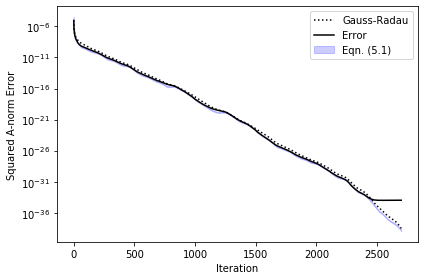

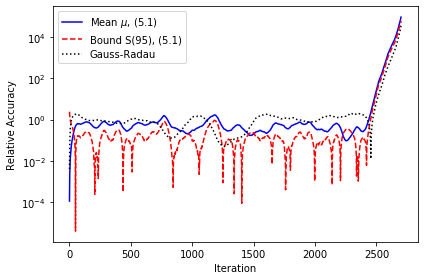

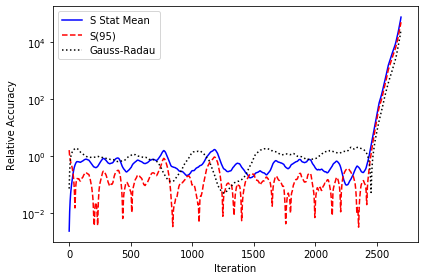

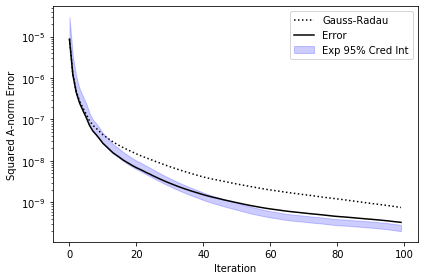

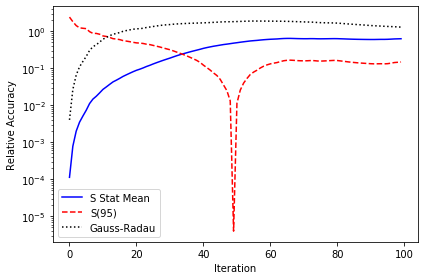

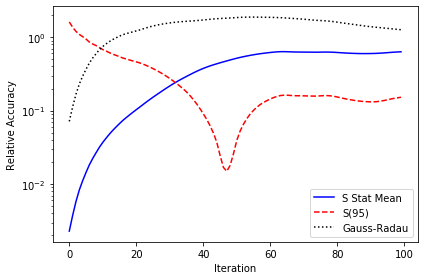

In [5]:
GR = 9e-14

#Delay
d = 50

#Iterations
it = 2700

#First iterations to zoom in on
it_z = 100

#S statistic samples per iteration
samples = None

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']


plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)
'''
plt.figure(3)
plt.savefig('../../NumericalSuppImages/BigCG.pdf')
plt.figure(4)
plt.savefig('../../NumericalSuppImages/BigErr.pdf')
'''


## Effects of Reorthogonalization

We examine the effect of reorthogonalization on BayesCG with the Krylov prior and the S statistic.

The matrix $\mathbf{A}$ is a random $n = 500$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = 10^4 + \frac{i-1}{500-1}(1000-0.1)(0.9)^{500-i}.$$ This eigenvalue distribution is originally from (Strakos, 1991). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

### Problem Setup

In [6]:
np.random.seed(1)

N = 500

A,_,_,min_eig,max_eig = random_matrix_generator(N,5,1)
CondA = max_eig/min_eig
NormA = max_eig

def AVec(w):
    return A@w


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

### Reorthogonalization

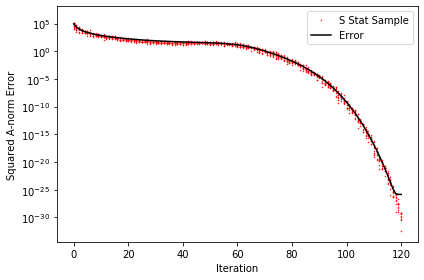

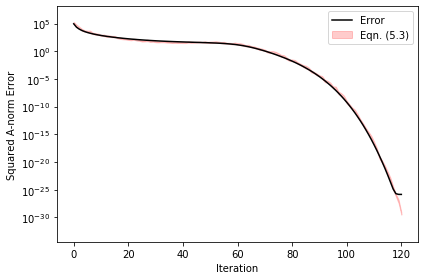

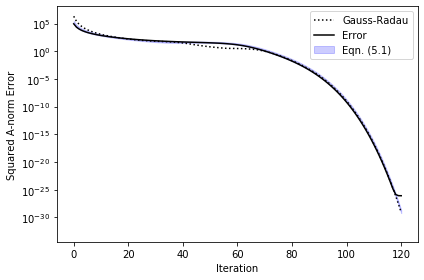

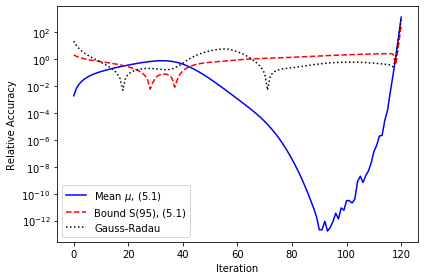

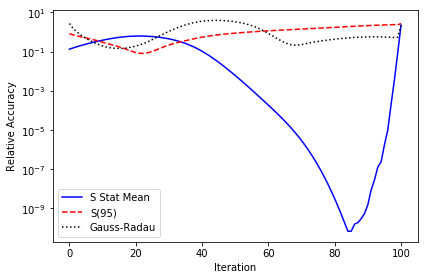

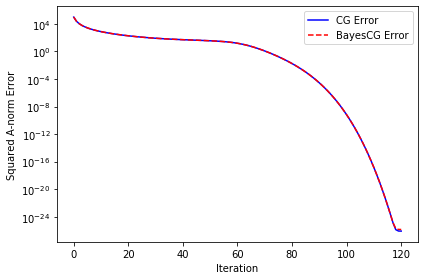

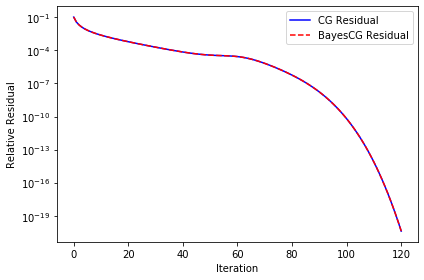

In [8]:
GR = None

#Delay
d = 20

#Iterations
it = 120

#First iterations to zoom in on
it_z = None

#S statistic samples per iteration
samples = 10

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 20

#Whether to reotrhogonalize
reorth = True

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,cgq=True,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(2)
plt.legend(label1)
plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)

'''
plt.figure(1)
plt.savefig('../../NumericalSuppImages/500SR.pdf')
plt.figure(2)
plt.savefig('../../NumericalSuppImages/500ConfR.pdf')
plt.figure(3)
plt.savefig('../../NumericalSuppImages/500CGR.pdf')
plt.figure(4)
plt.savefig('../../NumericalSuppImages/500ErrR.pdf')
'''


### No Reorthogonalization

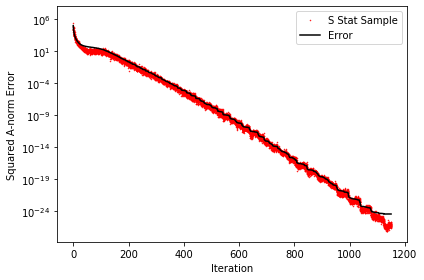

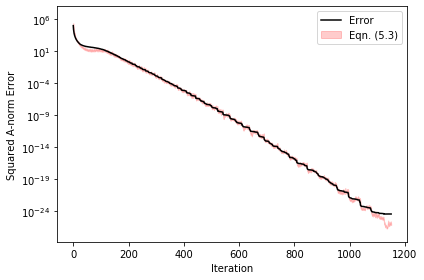

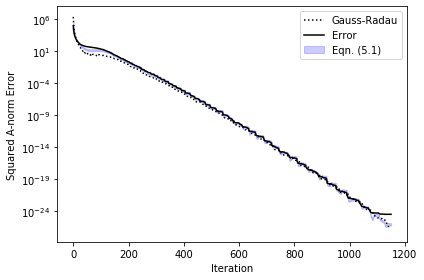

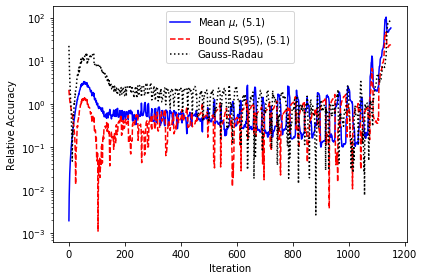

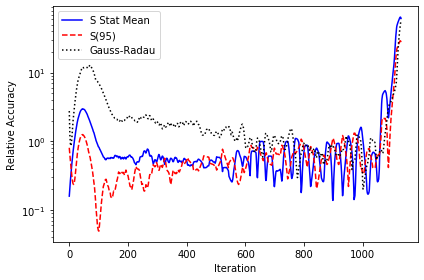

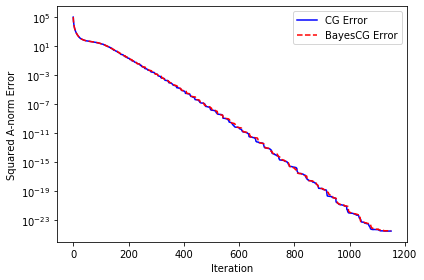

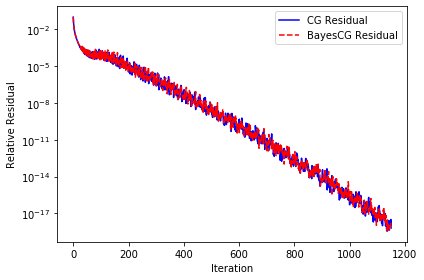

In [11]:
GR = None

#Delay
d = 20

#Iterations
it = 1150

#First iterations to zoom in on
it_z = None

#S statistic samples per iteration
samples = 10

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 20

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,cgq=True,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(2)
plt.legend(label1)
plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)

'''
plt.figure(1)
plt.savefig('../../NumericalSuppImages/500S.pdf')
plt.figure(2)
plt.savefig('../../NumericalSuppImages/500Conf.pdf')
plt.figure(3)
plt.savefig('../../NumericalSuppImages/500CG.pdf')
plt.figure(4)
plt.savefig('../../NumericalSuppImages/500Err.pdf')
'''


## BayesCG With Different Priors

We examine the performance of BayesCG with different prior covariances on two $n = 48$ matrices.

### First experiment

The matrix $\mathbf{A}$ is a random $n = 48$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = 10^4 + \frac{i-1}{48-1}(1000-0.1)(0.9)^{48-i}.$$ This eigenvalue distribution is originally from (Strakos, 1991). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

#### Setup

In [2]:
np.random.seed(1)

N = 48

A,_,AInv,min_eig,max_eig = random_matrix_generator(N,5,1)
CondA = max_eig/min_eig
NormA = max_eig

def AVec(w):
    return A@w

def AInvVec(w):
    return AInv@w

def IVec(w):
    return w

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

Err = xTrue - x0

def ErrVec(w):
    return np.inner(Err,w)*Err


#### Run the experiment

"\nplt.figure(1)\nplt.savefig('../../NumericalSuppImages/PriorErr.pdf')\nplt.figure(2)\nplt.savefig('../../NumericalSuppImages/PriorRes.pdf')\n"

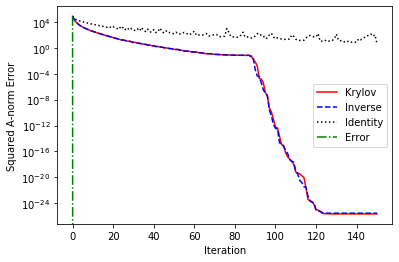

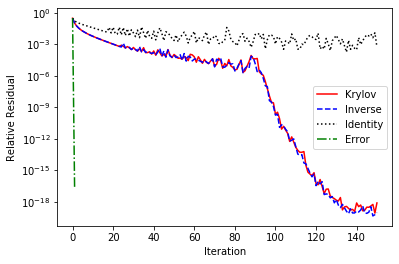

In [5]:
it = 150
reorth = False
delay = 1

_,_,_,info_k = bayescg_k(AVec,b,x0,delay,it,None,1e-150,reorth = reorth,NormA = NormA,xTrue = xTrue)

_,_,info_inv = bayescg(AVec,b,x0,AInvVec,it,None,reorth,NormA,xTrue)

_,_,info_I = bayescg(AVec,b,x0,IVec,it,None,reorth,NormA,xTrue)

it = 1
_,_,info_E = bayescg(AVec,b,x0,ErrVec,it,None,reorth,NormA,xTrue)

errK = info_k['err']
errInv = info_inv['err']
errI = info_I['err']
errE = info_E['err']

resK = info_k['res']
resInv = info_inv['res']
resI = info_I['res']
resE = info_E['res']

green = (0,0.5,0)

plt.figure(1)
plt.semilogy(errK, label = 'Krylov', color = 'r')
plt.semilogy(errInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(errI,':', label = 'Identity', color = 'k')
plt.semilogy(errE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Squared A-norm Error')
plt.legend()

plt.figure(2)
plt.semilogy(resK, label = 'Krylov', color = 'r')
plt.semilogy(resInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(resI,':', label = 'Identity', color = 'k')
plt.semilogy(resE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Relative Residual')
plt.legend()

'''
plt.figure(1)
plt.savefig('../../NumericalSuppImages/PriorErr.pdf')
plt.figure(2)
plt.savefig('../../NumericalSuppImages/PriorRes.pdf')
'''


### Second experiment

The matrix $\mathbf{A}$ is a random $n = 48$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = (10^5)^{(i-1)/(n-1)}.$$ This eigenvalue distribution is originally from (Greenbaum, 1997). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

#### Setup

In [14]:
np.random.seed(1)

N = 48

A,_,AInv,min_eig,max_eig = random_matrix_generator(N,5,0,)
CondA = max_eig/min_eig
NormA = max_eig


def AVec(w):
    return A@w

def AInvVec(w):
    return AInv@w

def IVec(w):
    return w

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

Err = xTrue - x0

def ErrVec(w):
    return np.inner(Err,w)*Err

#### Run the experiment

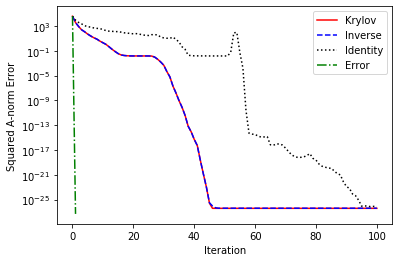

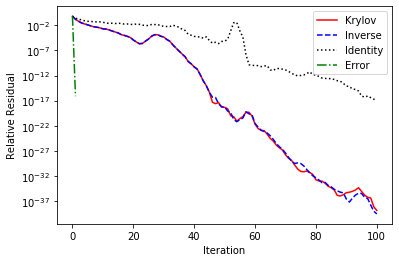

In [15]:
it = 100
reorth = False
delay = 1

_,_,_,info_k = bayescg_k(AVec,b,x0,delay,it,None,1e-150,reorth = reorth,NormA = NormA,xTrue = xTrue)

_,_,info_inv = bayescg(AVec,b,x0,AInvVec,it,None,reorth,NormA,xTrue)

_,_,info_I = bayescg(AVec,b,x0,IVec,it,None,reorth,NormA,xTrue)

it = 1
_,_,info_E = bayescg(AVec,b,x0,ErrVec,it,None,reorth,NormA,xTrue)

errK = info_k['err']
errInv = info_inv['err']
errI = info_I['err']
errE = info_E['err']

resK = info_k['res']
resInv = info_inv['res']
resI = info_I['res']
resE = info_E['res']

green = (0,0.5,0)

plt.figure(1)
plt.semilogy(errK, label = 'Krylov', color = 'r')
plt.semilogy(errInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(errI,':', label = 'Identity', color = 'k')
plt.semilogy(errE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Squared A-norm Error')
plt.legend()

plt.figure(2)
plt.semilogy(resK, label = 'Krylov', color = 'r')
plt.semilogy(resInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(resI,':', label = 'Identity', color = 'k')
plt.semilogy(resE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Relative Residual')
plt.legend()

'''
plt.figure(1)
plt.savefig('../../NumericalSuppImages/PriorErrRand.pdf')
plt.figure(2)
plt.savefig('../../NumericalSuppImages/PriorResRand.pdf')
'''


## Unpreconditioned $n=11948$ matrix

We rerun the second experiment from the main paper without a preconditioner.

The matrix in this experiment is the sparse matrix "BCSSTK18" from the Matrix Market.

The Gauss-Radau estimate in this experiment is the approximation of the Gauss-Radau upper bound from (Meurant and Tichy, 2019).

We have included a file, "bcsstk18.mtx' that contains the matrix. It can also be found at: (https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/bcsstruc2/bcsstk18.html)

### Setup


In [16]:
A = mmread('bcsstk18.mtx')
N = 11948

def AVec(w):
    return A.dot(w)

GR = None

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)


### Run the experiment (Takes a long time)

/Users/timreid/Dropbox/BayesCGKrylov/ProbNumCG-Supp/BayesCGExperiments/plots.py:144: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/timreid/Dropbox/BayesCGKrylov/ProbNumCG-Supp/BayesCGExperiments/plots.py:173: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/timreid/Dropbox/BayesCGKrylov/ProbNumCG-Supp/BayesCGExperiments/plots.py:204: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend wi

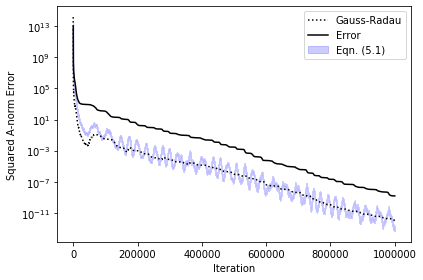

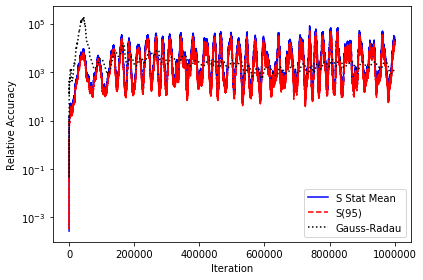

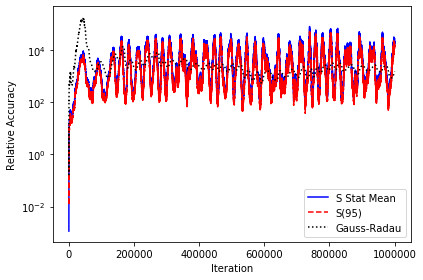

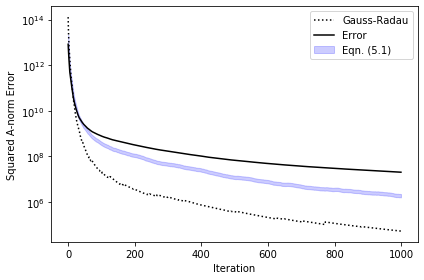

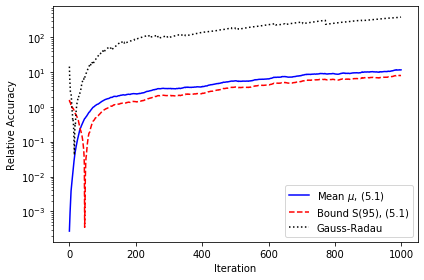

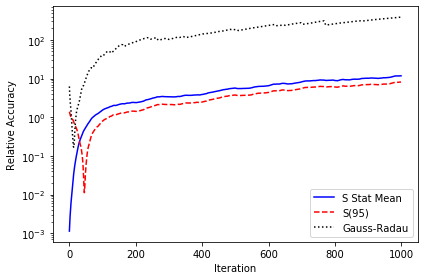

In [17]:
#Delay
d = 50

#Iterations
it = 1000000

#First iterations to zoom in on
it_z = 1000

#S statistic samples per iteration
samples = None

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(3)
plt.legend(label2)
plt.figure(10)
plt.legend(label2)
plt.figure(11)
plt.legend(label3)

'''
plt.figure(3)
plt.savefig('../../NumericalSuppImages/MillionCG.png',dpi=400)

plt.figure(10)
plt.savefig('../../NumericalSuppImages/MillionCG_z.pdf')
plt.figure(11)
plt.savefig('../../NumericalSuppImages/MillionErr_z.pdf')
'''



## Help with the programs

All the included programs have docstrings written for them. You can type "help(FunctionNameHere)" to access the docstrings. See the example below:

In [2]:
help(bayescg_k)

Help on function bayescg_k in module bayescg_k:

bayescg_k(A, b, x, post_rank=5, max_it=None, tol=1e-06, l_tol=1e-32, samples=None, reorth=False, NormA=None, xTrue=None)
    Computes solution to Ax = b with BayesCG with Krylov Prior
    
    This program iteratively solves a symmetric positive definite system 
    of linear equations with a with the Bayesian Conjugate Gradient method
    under the Krylov prior, a probabilistic numerical method. This 
    implementation is based on the Conjugate Gradient method.
            
    Parameters
    ----------
    A : function
        Function that computes the matvec of A
    b : numpy array
        Right hand side vector from equation Ax = b
    x : numpy array
        Initial guess for x in equation Ax = b
    post_rank : int, optional, default is 5
        Rank of Krylov Posterior Covariance
    max_it : int, optional, default is size of A
        Maximum amount of iterations to run
    tol : float, optional, default is 1e-6
        Conve

## References

Z. Strakos, *On the real convergence rate of the conjugate gradient method*, Linear Algebra
Appl., 154/156 (1991), pp. 535–549, https://doi.org/10.1016/0024-3795(91)90393-B.

G. Meurant and P. Tichy, *On computing quadrature-based bounds for the A-norm of the error in conjugate gradients*, Numer. Algorithms, 62 (2013), pp. 163–191, https://doi.org/10.1007/s11075-012-9591-9.

G. Meurant and P. Tichy, *Approximating the extreme Ritz values and upper bounds for the A-norm of the error in CG*, Numer. Algorithms, 82 (2019), pp. 937–968, https://doi.org/10.1007/s11075-018-0634-8.

A. Greenbaum, *Estimating the attainable accuracy of recursively computed residual methods*, SIAM J. Matrix Anal. Appl., 18 (1997), pp. 535–551, https://doi.org/10.1137/S0895479895284944.